# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [38]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/Stitchclone3/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


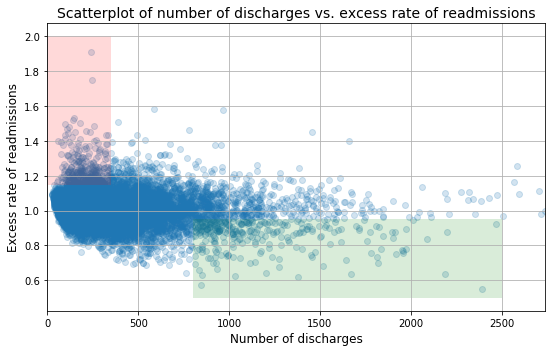

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

I do not feel strongly about their conclusions. The correlation between hostpital capacity and excess readmissions ratio seems weak. The areas shaded red and green seem arbitrary; there wasn't a reason given for the choice of boundaries. They don't even line up with the bullet points in the Statistics section.

Calculate correlation coefficient. A Pearson correlation coefficient of -0.097 is not very strong at all. Using the slice that was used to make the plot above, the coefficient is slightly higher, but still indicates a weak correlation.

In [16]:
clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].corr(method='pearson')

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


In [17]:
clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:-3].corr(method='pearson')

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.093096
Excess Readmission Ratio,-0.093096,1.000000


Set up an appropriate hypothesis test (this one will directly test the recommendation above):

H_0: Hospitals with low capacity (< 300) have the same average excess rate of readmissions as other hospitals.

H_a: Hostpitals with low capacity (< 300) have a lower average excess rate of readmissions than other hospitals.

The hypothesis test will be a 2-sample t-test of the mean of the excess ratio of readmissions between the groups of capacity > 300 and capacity < 300.

In [14]:
len(clean_hospital_read_df)

11578

I will need to take a sample of this, for capacity less than 300 and capacity greater than or equal to 300.

For the independence condition to be satisfied, I need to have less than 10% of the data.

In [18]:
clean_sample_small_hosp = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 300].sample(frac=0.09, random_state=42)
clean_sample_large_hosp = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 300].sample(frac=0.09, random_state=43)

In [19]:
small_hosp_avg_readm = clean_sample_small_hosp['Excess Readmission Ratio'].mean()
large_hosp_avg_readm = clean_sample_large_hosp['Excess Readmission Ratio'].mean()

small_hosp_std_readm = clean_sample_small_hosp['Excess Readmission Ratio'].std()
large_hosp_std_readm = clean_sample_large_hosp['Excess Readmission Ratio'].std()

small_hosp_count_readm = len(clean_sample_small_hosp['Excess Readmission Ratio'])
large_hosp_count_readm = len(clean_sample_large_hosp['Excess Readmission Ratio'])

print("Small Hospitals Data - Avg: " + str(small_hosp_avg_readm) +
      ", Std: " + str(small_hosp_std_readm) +
      ", Num: " + str(small_hosp_count_readm))
print("Large Hospitals Data - Avg: " + str(large_hosp_avg_readm) +
      ", Std: " + str(large_hosp_std_readm) +
      ", Num: " + str(large_hosp_count_readm))

Small Hospitals Data - Avg: 1.01261520147, Std: 0.0770599414471, Num: 557
Large Hospitals Data - Avg: 0.993975983437, Std: 0.0968018914355, Num: 483


In [20]:
mean_diff_readm = small_hosp_avg_readm - large_hosp_avg_readm
total_std_readm = np.sqrt((small_hosp_std_readm**2)/small_hosp_count_readm +
                         (large_hosp_std_readm**2)/large_hosp_count_readm)

In [21]:
t_stat_readm = mean_diff_readm / total_std_readm
t_stat_readm

3.399532170179919

For a t-test of 1000 degrees of freedom, the critical value for a p-value of 0.001 is 3.300. Since our value is larger than that, there is less than a 0.1% chance that these means differ by chance alone, and we reject my null hypothesis. :(

Z-test for the difference of means. The difference of means is approximately normal here, and we take alpha = 0.01. For the boundaries of 0.005 and 0.995, we use the z-scores of -2.57 and 2.57.

In [28]:
print("There is a 99% chance for the difference of the means of these groups to be between",
      '%.4f'%(-total_std_readm * 2.57),
      '%.4f'%(total_std_readm * 2.57),
      "by chance alone.")

('There is a 99% chance for the difference of the means of these groups to be between', '-0.0141', '0.0141', 'by chance alone.')


In [29]:
mean_diff_readm

0.01863921802834867

The z-test via 99% confidence interval agrees with the 2-sample t-test, and also rejects my null hypothesis. Thus, I conclude that there is a difference in the excess ratio of readmissions between hospitals with capacity greater and less than 300.

While the statistical significance is still enough to say that the two groups have different means, this is mostly because we have a large population and sample to work with. In reality, the difference between the means (0.0186) is only ~2% of the actual values of the mean ratio of mean readmissions (0.994 and 1.012). This 2% difference means that practically, there isn't much that small hospitals should do differently than other hospitals.

The recommendations given before are probably in good nature, but excessive. 

The scatterplot above is reasonable in terms of presenting raw data, but the density of data points in some areas can prevent the plot from conveying the number of data points. The red and green boxed areas are only minimally helpful.

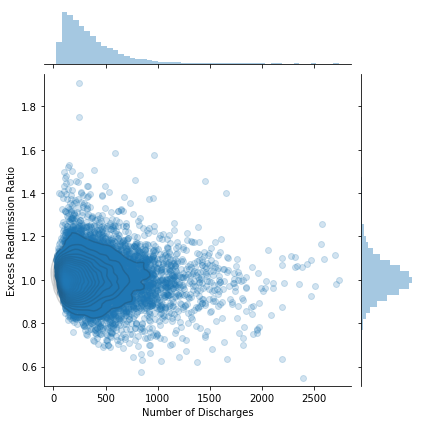

In [85]:
jp = sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio',
                  data=clean_hospital_read_df[81:-3], kind='scatter', alpha=0.2)
#jp = plt.title('Excess Readmission Ratio vs Hospital Capacity')
jp.plot_joint(sns.kdeplot, n_levels=20, alpha=0.2)

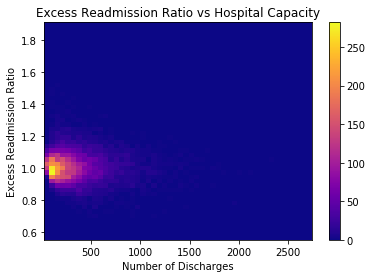

In [86]:
x = list(clean_hospital_read_df['Number of Discharges'][81:-3])
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

_ = plt.hist2d(x=x, y=y, bins=(50,50), cmap='plasma')
_ = plt.title('Excess Readmission Ratio vs Hospital Capacity')
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')
plt.colorbar()